In [59]:
from standardInclude import *

In [60]:
#f = r.TFile("./data/gm2offline_ana.root")
#f = r.TFile("./data/gm2offline_ana_onlyAboveThresholdClusters.root")
#f = r.TFile("./data/results_9files_truncationComparison.root")
#f = r.TFile("./data/gm2offline_ana_sameClustering.root")
f = r.TFile("./data/results_10MissingOutputFiles_9day_histOnly.root")
f.ls()

TFile**		./data/results_10MissingOutputFiles_9day_histOnly.root	
 TFile*		./data/results_10MissingOutputFiles_9day_histOnly.root	
  KEY: TDirectoryFile	clustersAndCoincidences;1	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	clustersAndCoincidencesTrunc;1	clustersAndCoincidencesTrunc (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	farline;1	farline (CaloFarlineHistograms) folder
  KEY: TDirectoryFile	farlineTrunc;1	farlineTrunc (CaloFarlineHistograms) folder
  KEY: TDirectoryFile	clusterCompare;1	clusterCompare (ReconComparisonTruncatedVsFull) folder


# Notebook to check whether there is any early to late effect in the number of clusters by energy

---

### Lets first grab Aarons clustering

In [61]:
clusters = f.Get("clustersAndCoincidences").Get("clusters").Clone("clusters")
clustersTrunc = f.Get("clustersAndCoincidencesTrunc").Get("clusters").Clone("clustersTrunc")

---

### Now lets break this up into energy divisions

In [62]:
energyBin = 50
minE = 0
maxE = 6000
rebinFactor = 1
#sumw2 = False
sumw2 = True

#times for fitting
tmin = 20
tmax = 650

caloMin = 0
caloMax = 25

In [63]:
energies = [x for x in range(minE, maxE+1, energyBin)]
Nbins = len(energies)
print(energies)

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450, 2500, 2550, 2600, 2650, 2700, 2750, 2800, 2850, 2900, 2950, 3000, 3050, 3100, 3150, 3200, 3250, 3300, 3350, 3400, 3450, 3500, 3550, 3600, 3650, 3700, 3750, 3800, 3850, 3900, 3950, 4000, 4050, 4100, 4150, 4200, 4250, 4300, 4350, 4400, 4450, 4500, 4550, 4600, 4650, 4700, 4750, 4800, 4850, 4900, 4950, 5000, 5050, 5100, 5150, 5200, 5250, 5300, 5350, 5400, 5450, 5500, 5550, 5600, 5650, 5700, 5750, 5800, 5850, 5900, 5950, 6000]


In [64]:
c = r.TCanvas("c","c",5000,5000)
width = 5
height = int(np.ceil(Nbins / width))
c.Divide(width, height)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [65]:
energyBinHists = []
for i in range(len(energies) - 1):
    e1 = energies[i]
    e2 = energies[i+1]
    #print(e1,e2)
    clusters.GetYaxis().SetRangeUser(e1,e2)
    caloBinMin = clusters.GetZaxis().FindBin(caloMin)
    caloBinMax = clusters.GetZaxis().FindBin(caloMax)
    clusters.GetZaxis().SetRange(caloBinMin, caloBinMax)
    clusteri = clusters.Project3D("x").Clone("cluster_"+str(i))
    clusteri.SetTitle("Full Clusters in Energy Range: "+str(e1)+" - "+str(e2)+" MeV")
    clusteri.Rebin(rebinFactor)
    
    clustersTrunc.GetYaxis().SetRangeUser(e1,e2)
    clustersTrunc.GetZaxis().SetRange(caloBinMin, caloBinMax)
    clusterTrunci = clustersTrunc.Project3D("x").Clone("clusterTrunc_"+str(i))
    clusterTrunci.SetTitle("Truncated Clusters in Energy Range: "+str(e1)+" - "+str(e2)+" MeV")
    clusterTrunci.SetLineColor(2)
    clusterTrunci.Rebin(rebinFactor)
    if(sumw2):
        clusteri.Sumw2()
        clusterTrunci.Sumw2()
    
    energyBinHists.append( (clusteri, clusterTrunci) )

In [66]:
print(energyBinHists)

[(<ROOT.TH1D object ("cluster_0") at 0x7fffe3429130>, <ROOT.TH1D object ("clusterTrunc_0") at 0x7fffe4224d80>), (<ROOT.TH1D object ("cluster_1") at 0x7fffe48229c0>, <ROOT.TH1D object ("clusterTrunc_1") at 0x7fffe48249f0>), (<ROOT.TH1D object ("cluster_2") at 0x7fffe482e5b0>, <ROOT.TH1D object ("clusterTrunc_2") at 0x7fffe4823d50>), (<ROOT.TH1D object ("cluster_3") at 0x7fffe4824f20>, <ROOT.TH1D object ("clusterTrunc_3") at 0x7fffe34364d0>), (<ROOT.TH1D object ("cluster_4") at 0x7f131ca1d380>, <ROOT.TH1D object ("clusterTrunc_4") at 0x7fffe3392220>), (<ROOT.TH1D object ("cluster_5") at 0x7f131ca0e8d0>, <ROOT.TH1D object ("clusterTrunc_5") at 0x7f131ca0d4d0>), (<ROOT.TH1D object ("cluster_6") at 0x7f131c9f6840>, <ROOT.TH1D object ("clusterTrunc_6") at 0x7f131ca1ffc0>), (<ROOT.TH1D object ("cluster_7") at 0x7f131ca17530>, <ROOT.TH1D object ("clusterTrunc_7") at 0x7fffe2fa56c0>), (<ROOT.TH1D object ("cluster_8") at 0x7f131c9b36b0>, <ROOT.TH1D object ("clusterTrunc_8") at 0x7fffe3348e40>), 

In [67]:
for i, (ci, cti) in enumerate(energyBinHists):
    #print(i, ci)
    c.cd(i+1)
    ci.Draw("hist e")
    cti.Draw("SAME hist e")
    r.gPad.SetLogy()

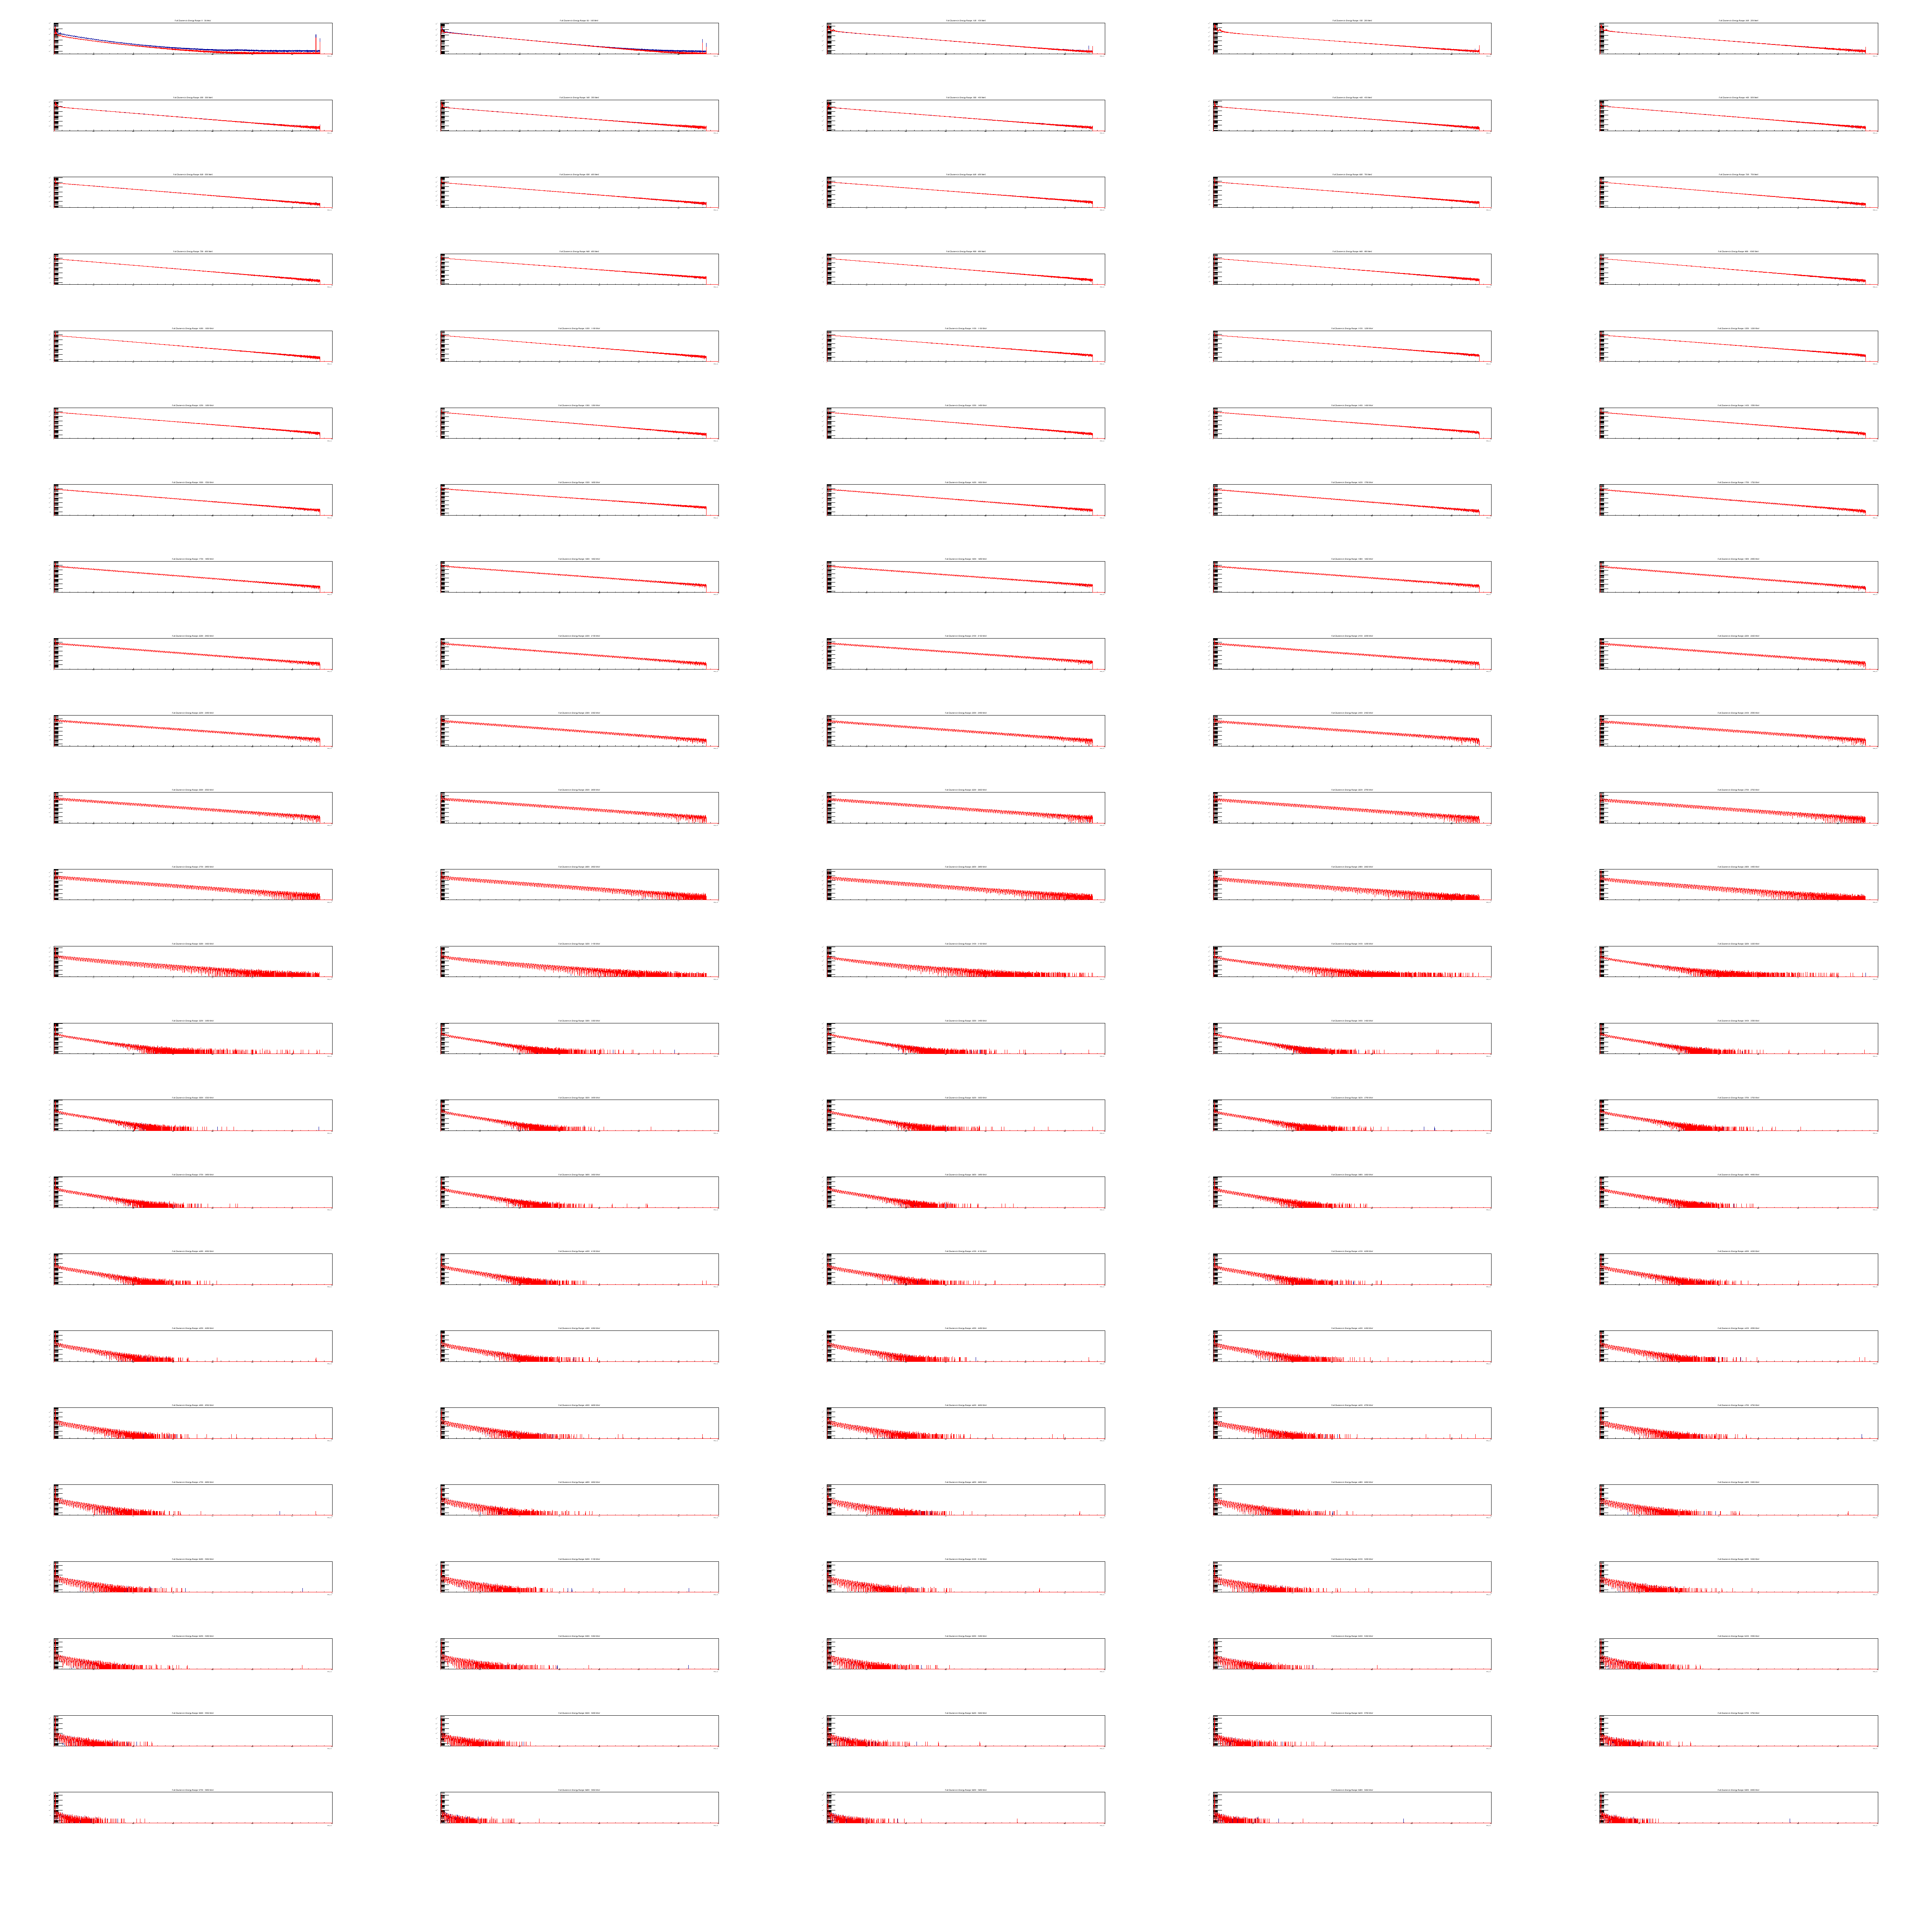

In [68]:
c.Draw()

In [69]:
energyDiffHists = []
for i, (ci, cti) in enumerate(energyBinHists):
    edi = ci.Clone("clusterDiff_"+str(i))
    edi.SetTitle("Difference in Clusters: Full - Trunc")
    edi.Add(cti, -1)
    energyDiffHists.append(edi)

In [70]:
print(energyDiffHists)

[<ROOT.TH1D object ("clusterDiff_0") at 0x7f1344ab06d0>, <ROOT.TH1D object ("clusterDiff_1") at 0x7f13140fda00>, <ROOT.TH1D object ("clusterDiff_2") at 0x7fffe31f5250>, <ROOT.TH1D object ("clusterDiff_3") at 0x7f1313ea96a0>, <ROOT.TH1D object ("clusterDiff_4") at 0x7f1344b0f830>, <ROOT.TH1D object ("clusterDiff_5") at 0x7f131c37e6d0>, <ROOT.TH1D object ("clusterDiff_6") at 0x7f13141cda70>, <ROOT.TH1D object ("clusterDiff_7") at 0x7f131c434cd0>, <ROOT.TH1D object ("clusterDiff_8") at 0x7f131c675670>, <ROOT.TH1D object ("clusterDiff_9") at 0x7f131c6fbfb0>, <ROOT.TH1D object ("clusterDiff_10") at 0x7fffe343d0d0>, <ROOT.TH1D object ("clusterDiff_11") at 0x7f131c3c2a60>, <ROOT.TH1D object ("clusterDiff_12") at 0x7f13445743c0>, <ROOT.TH1D object ("clusterDiff_13") at 0x7f131410a680>, <ROOT.TH1D object ("clusterDiff_14") at 0x7f1314593520>, <ROOT.TH1D object ("clusterDiff_15") at 0x7f1314229710>, <ROOT.TH1D object ("clusterDiff_16") at 0x7f131c3f4ce0>, <ROOT.TH1D object ("clusterDiff_17") at 

In [71]:
energyDiffInverseHists = []
for edi in energyDiffHists:
    edinv = edi.Clone()
    for i in range(edinv.GetNbinsX() + 1):
        edinv.SetBinContent(i, edinv.GetBinContent(i)*-1)
    edinv.SetLineColor(2)
    energyDiffInverseHists.append(edinv)

In [72]:
for i, edi in enumerate(energyDiffHists):
    #print(i, ci)
    c.cd(i+1)
    edi.Draw("hist e")
    energyDiffInverseHists[i].Draw("SAME hist e")
    r.gPad.SetLogy()
    
leg = r.TLegend(0.7,0.7,0.9,0.9)
leg.AddEntry(edi,"Full","l")
leg.AddEntry(energyDiffInverseHists[i],"Truncated","l")
leg.Draw()

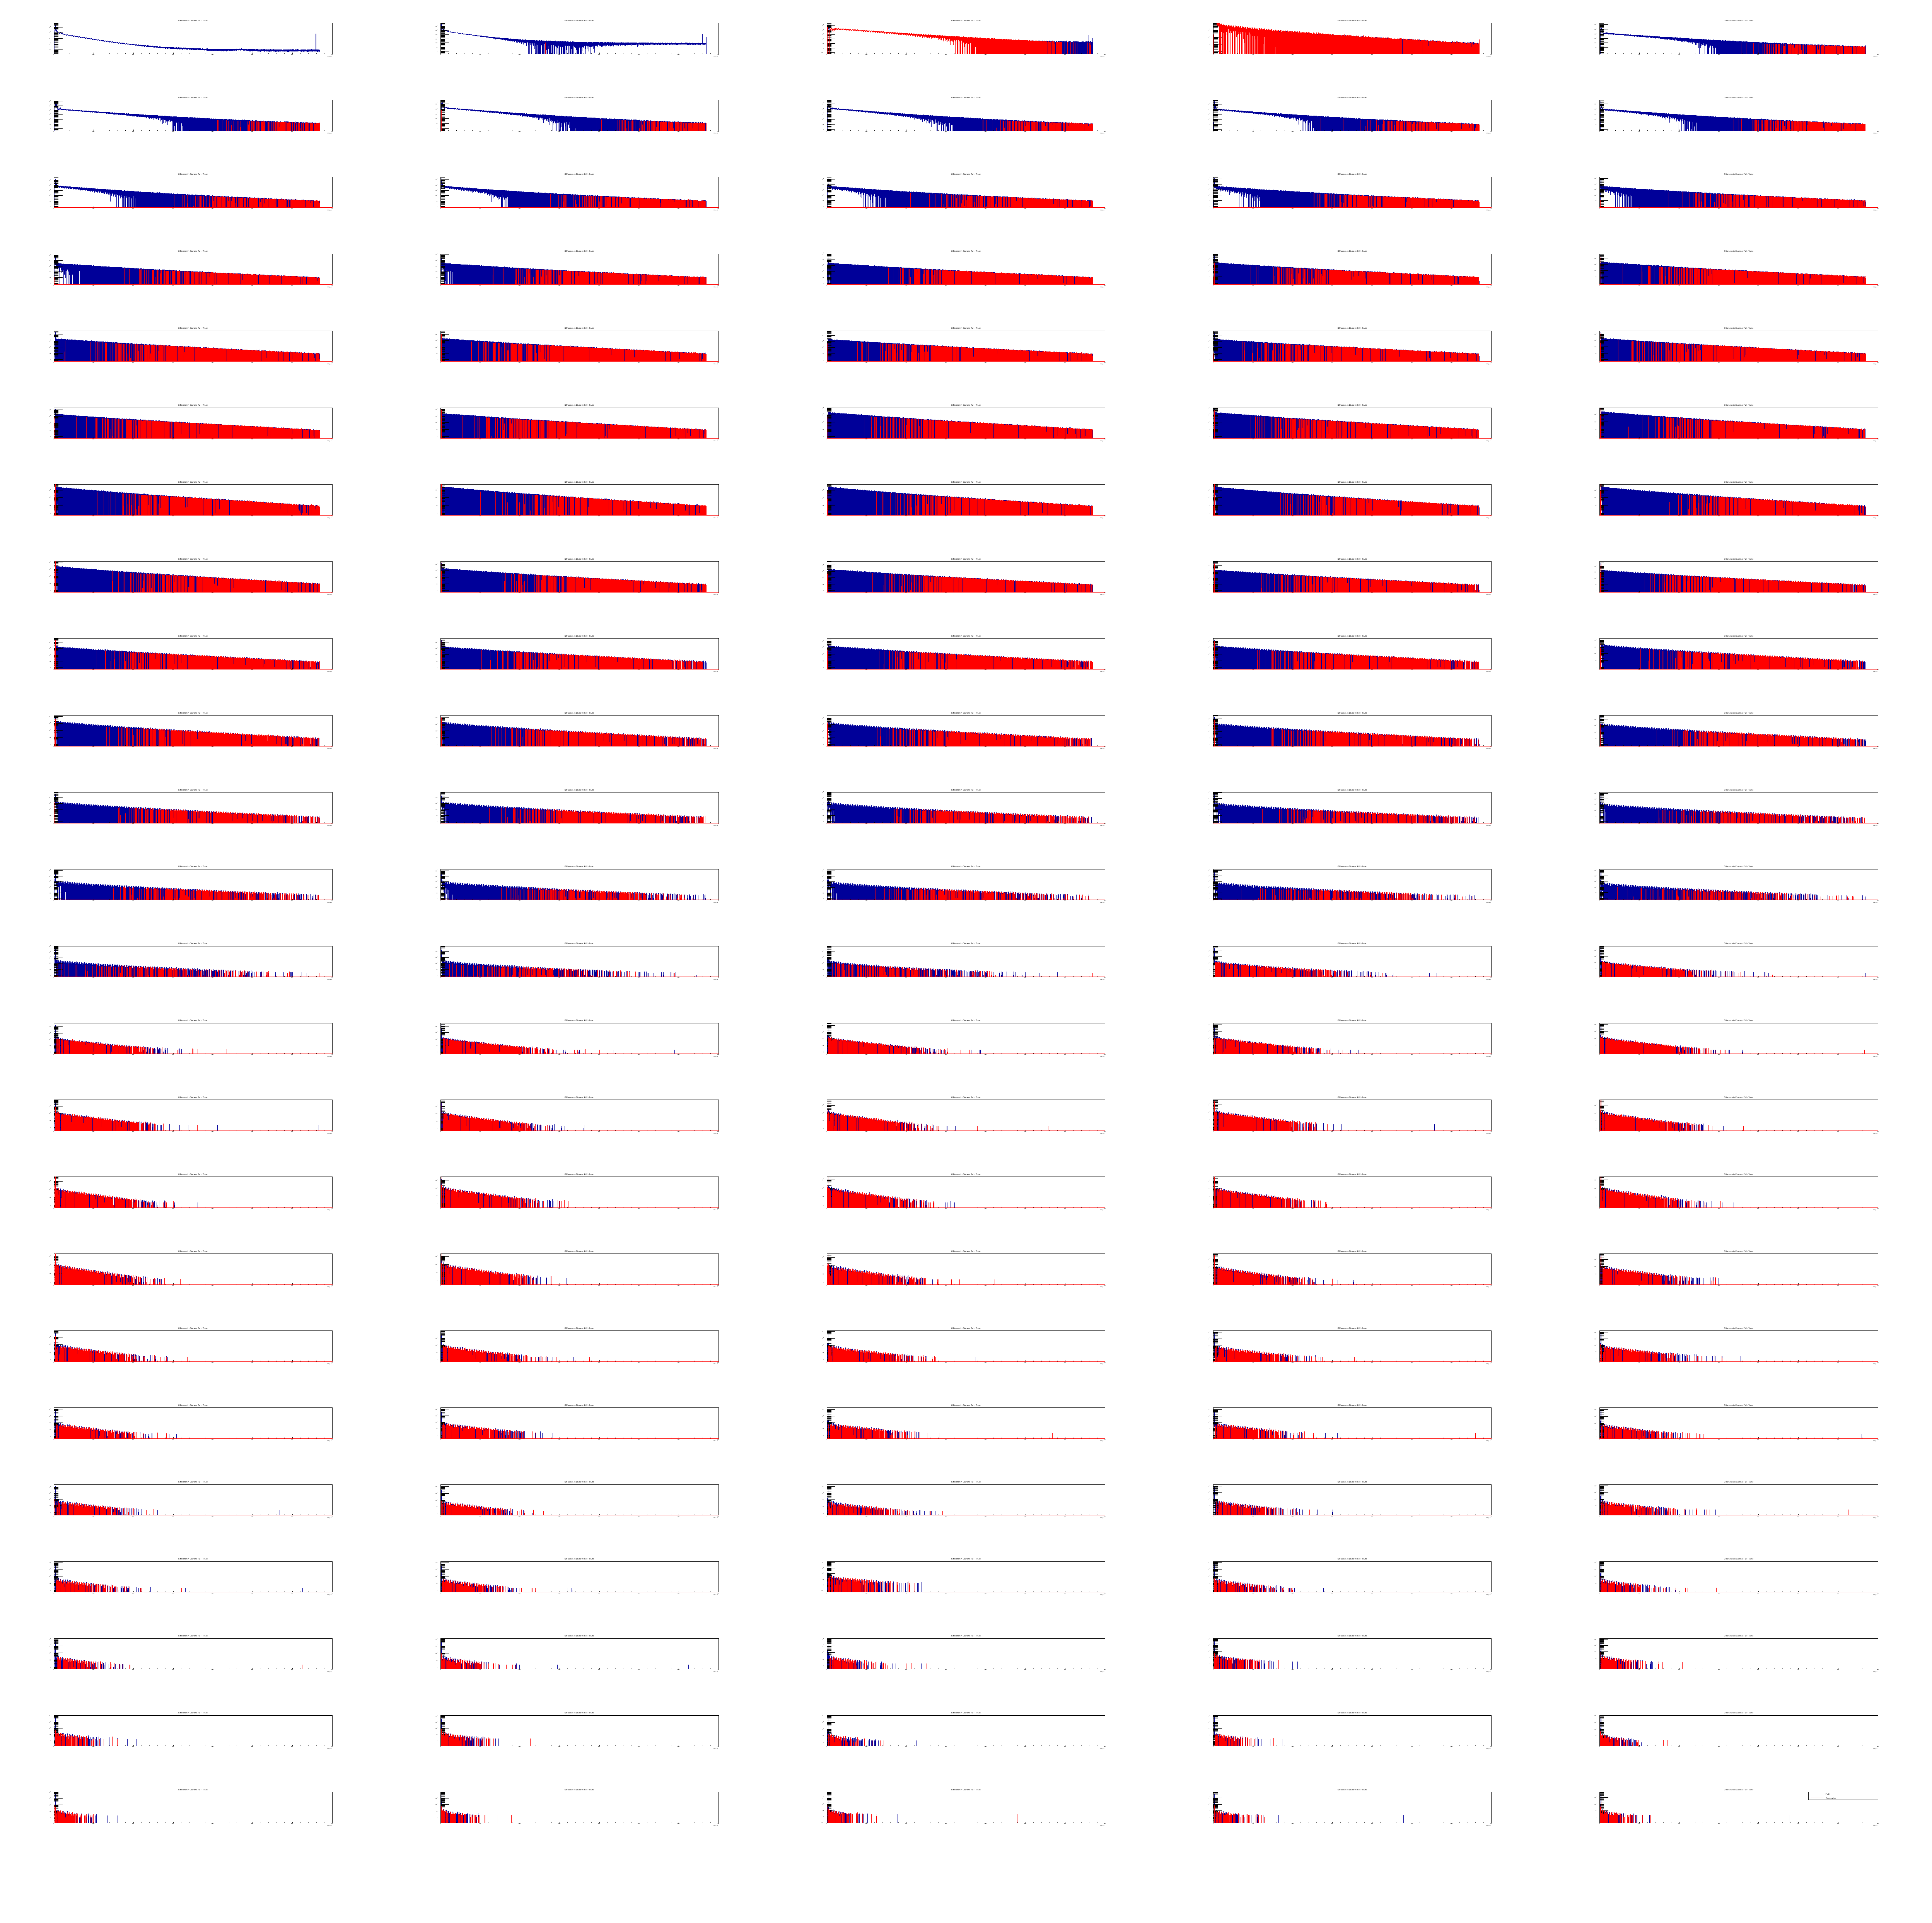

In [73]:
c.Draw()

---

### And now the ratio

In [74]:
energyRatioHists = []
for i, edi in enumerate(energyDiffHists):
    eri = edi.Clone()
    e1 = energies[i]
    e2 = energies[i+1]
    eri.SetTitle("Clusters (Full - Trunc) / Full in Energy Range: "+str(e1)+" - "+str(e2)+" MeV")
    eri.Divide( energyBinHists[i][0] )
    energyRatioHists.append( eri )

In [75]:
energyRatioInverseHists = []
for eri in energyRatioHists:
    erinv = eri.Clone()
    for i in range(erinv.GetNbinsX() + 1):
        erinv.SetBinContent(i, erinv.GetBinContent(i)*-1)
    erinv.SetLineColor(2)
    energyRatioInverseHists.append(erinv)

In [76]:
linFit = r.TF1("linFit","pol1",tmin,tmax)

In [77]:
ratioFits = []
ratioErrs = []
for i, eri in enumerate(energyRatioHists):
    #print(i, ci)
    c.cd(i+1)
    eri.Draw("hist ")
    #eri.GetXaxis().SetRangeUser(400,450)
    eri.Fit("linFit","REMBQ")
    ratioFits.append( ( linFit.GetParameter(0),linFit.GetParameter(1) ) )
    ratioErrs.append( ( linFit.GetParError(0),linFit.GetParError(1) ) )
    #energyRatioInverseHists[i].Draw("SAME hist e")
    r.gPad.SetLogy(0)

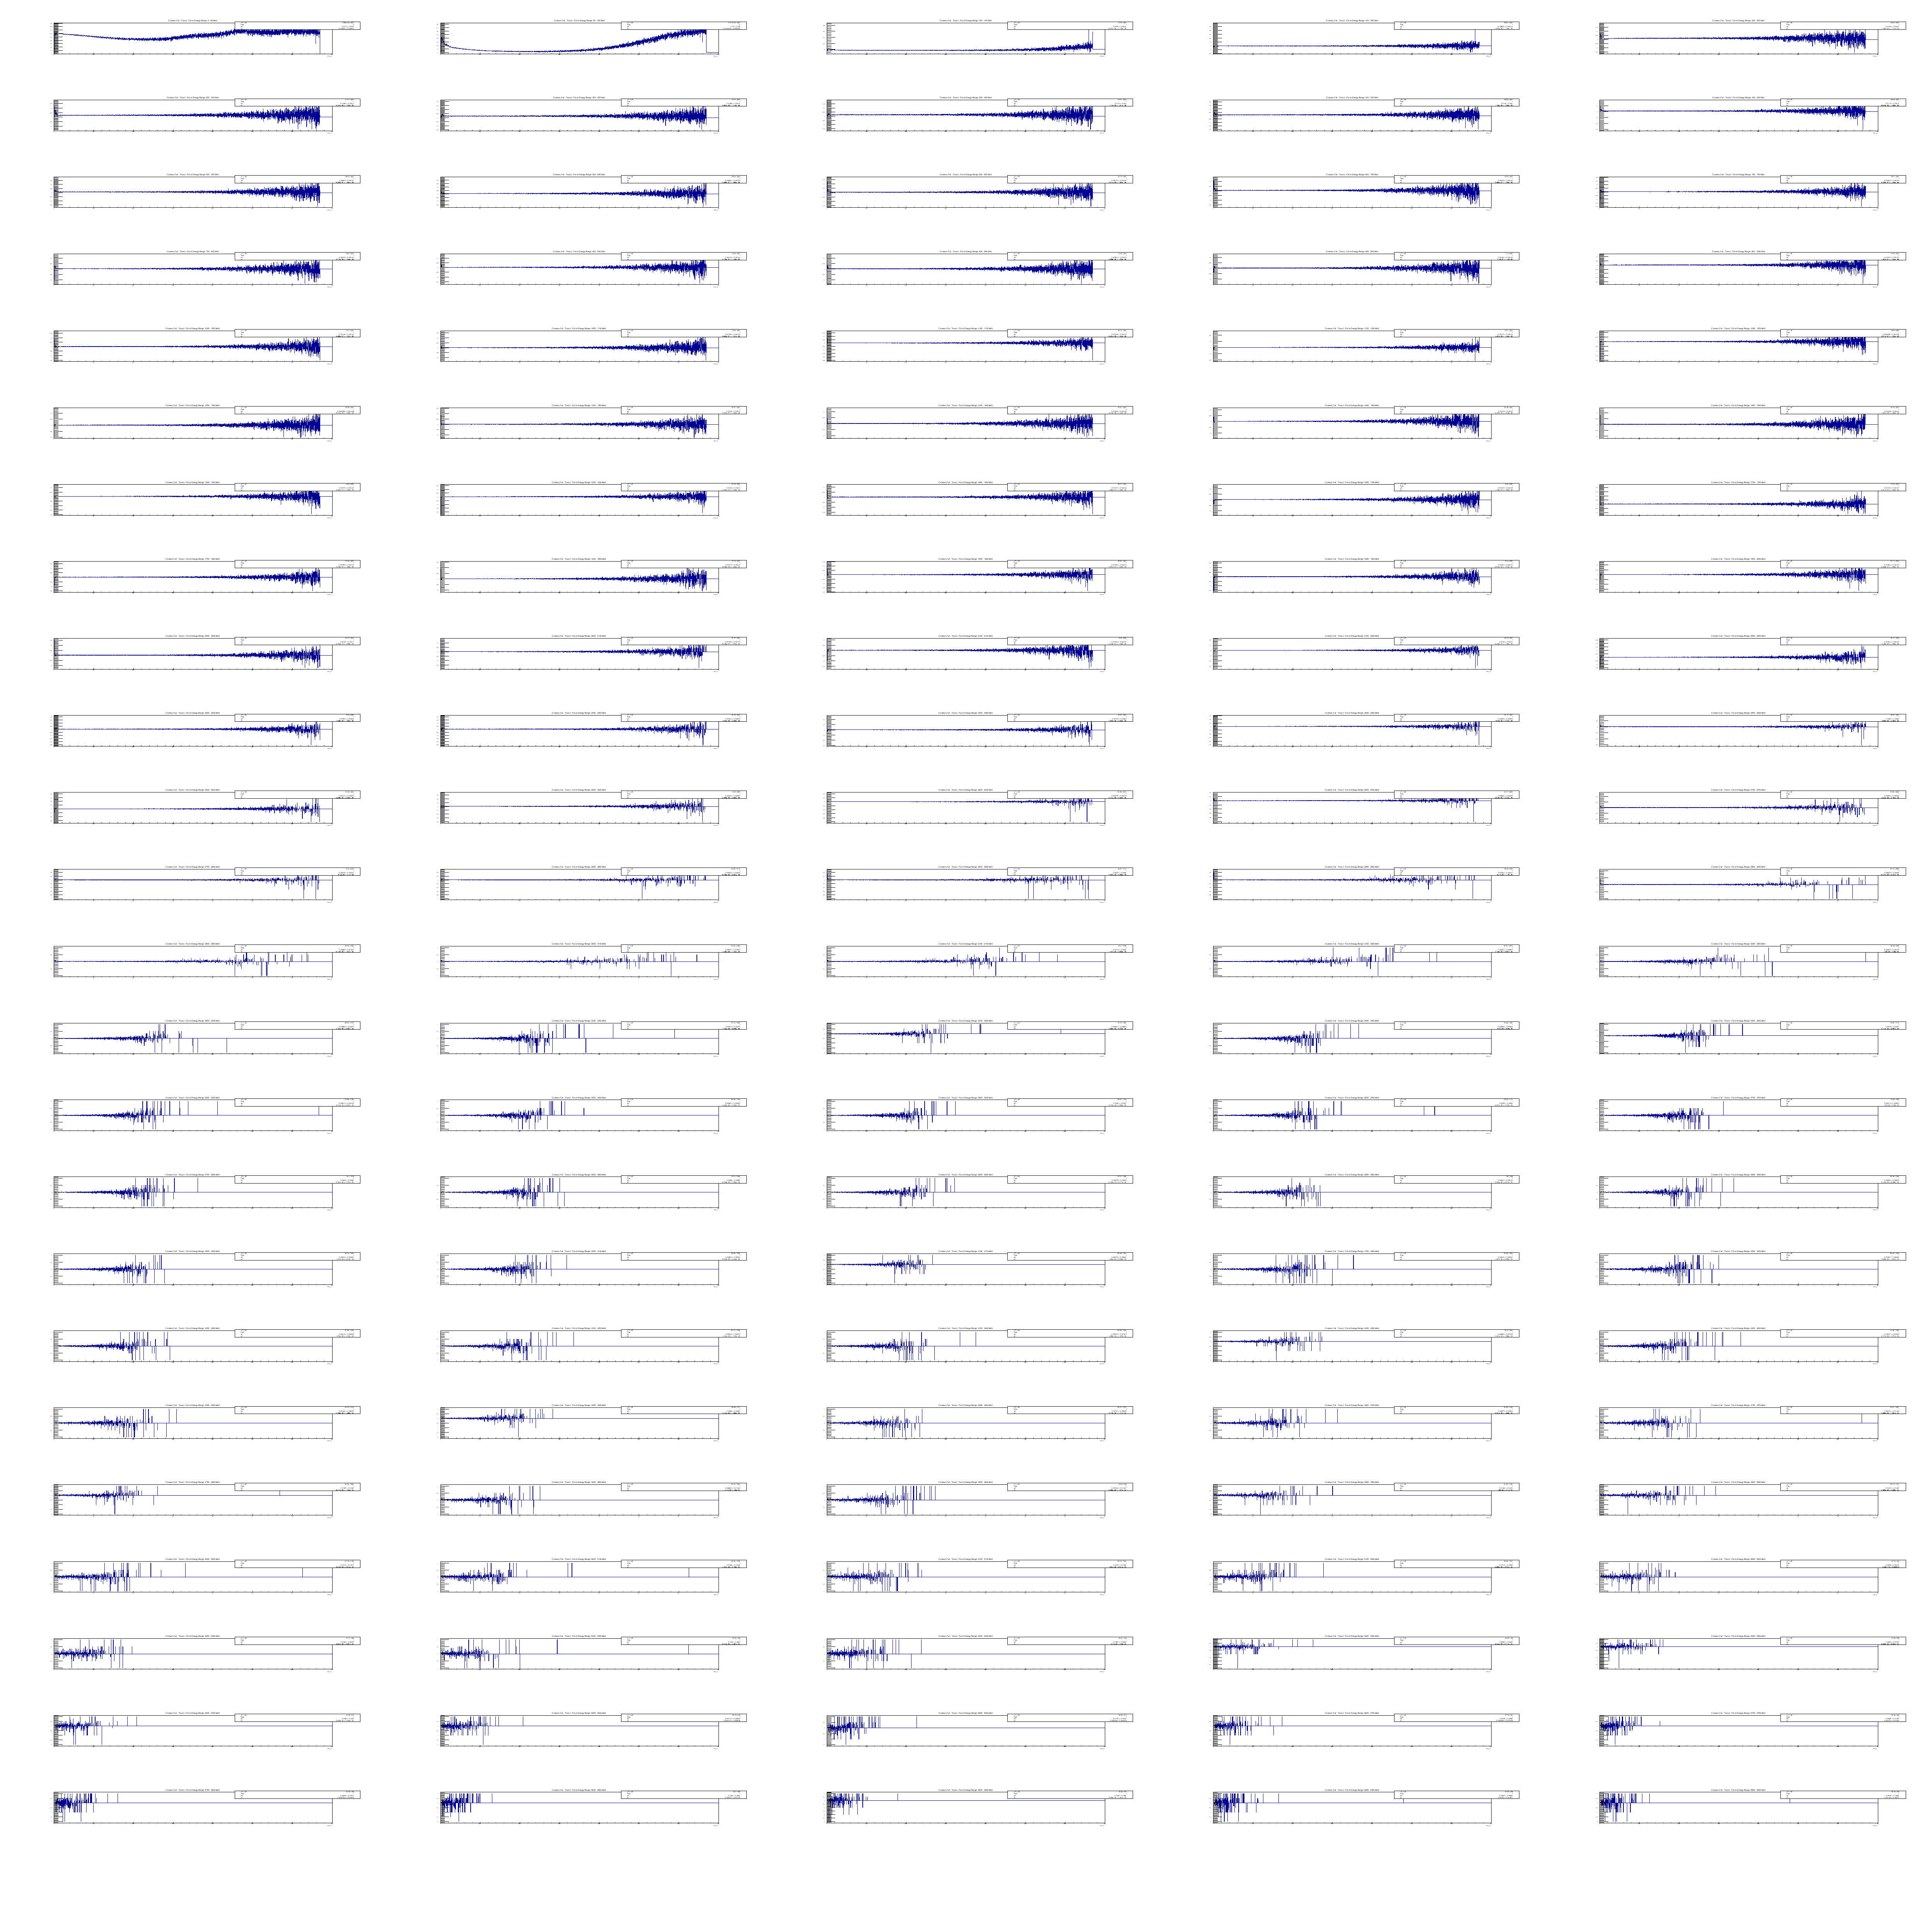

In [78]:
c.Draw()

In [79]:
p0s,p1s = zip(*ratioFits)
p0es,p1es = zip(*ratioErrs)

In [80]:
print([x for x in zip(energies, p1s)])

[(0, -0.0003550052787464667), (50, -0.00044051717173578843), (100, -2.7505902311765278e-05), (150, -1.4639482944265952e-06), (200, 1.745309817042136e-05), (250, 9.244058951796781e-06), (300, 3.3066702192269774e-06), (350, 1.1743040550028205e-06), (400, 1.1685406875941976e-06), (450, -5.5194713078526416e-08), (500, 5.023346598201531e-07), (550, 2.837627412638499e-07), (600, -7.67133913599183e-08), (650, 3.3377100701263736e-07), (700, 3.4631456542435564e-07), (750, 9.715221853072776e-08), (800, 3.153387573428985e-07), (850, -4.368057091603493e-08), (900, 2.1602641093470108e-07), (950, 1.9365920414089046e-07), (1000, 5.808222393992079e-07), (1050, 3.583995926587427e-07), (1100, 8.081343589063025e-08), (1150, 4.3268747276098936e-08), (1200, 3.016810691857717e-07), (1250, 2.5132723071927118e-08), (1300, 3.9759368098725233e-07), (1350, 9.012773010694458e-08), (1400, 3.04066204410242e-07), (1450, 1.8474565413717965e-08), (1500, 2.435028400541014e-07), (1550, 3.351581466490839e-07), (1600, 1.6

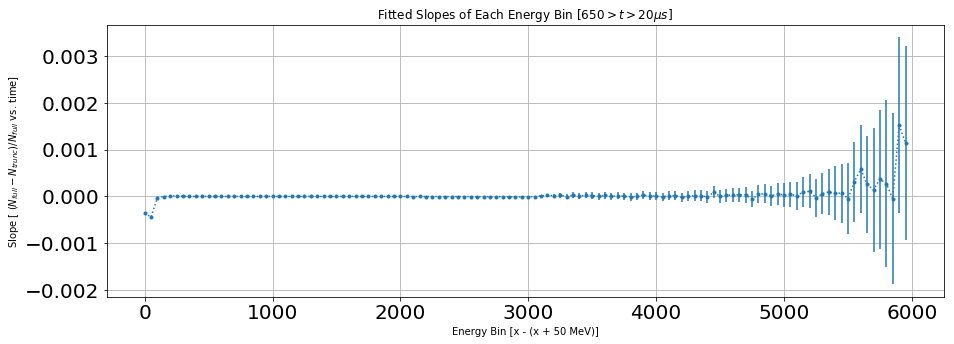

In [81]:
fig,ax = plt.subplots(figsize=(15,5))
plt.errorbar(energies[:-1],p1s,yerr=p1es,fmt='.:')
plt.title(r"Fitted Slopes of Each Energy Bin [$"+str(tmax)+" > t > "+str(tmin)+" \mu s$]")
plt.xlabel("Energy Bin [x - (x + "+str(energyBin)+" MeV)]")
plt.ylabel(r"Slope [ $( N_{full} - N_{trunc} ) / N_{full}$ vs. time]")
#plt.ylim(-0.0001,0.0001)
plt.grid()
plt.show()

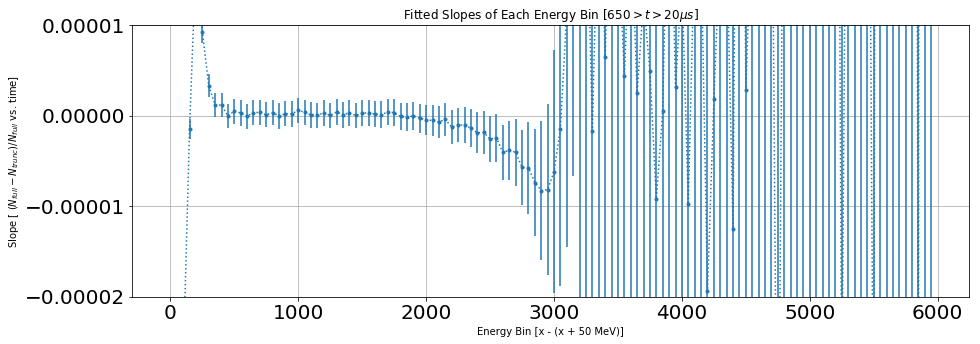

In [82]:
fig,ax = plt.subplots(figsize=(15,5))
plt.errorbar(energies[:-1],p1s,yerr=p1es,fmt='.:')
plt.title(r"Fitted Slopes of Each Energy Bin [$"+str(tmax)+" > t > "+str(tmin)+" \mu s$]")
plt.xlabel("Energy Bin [x - (x + "+str(energyBin)+" MeV)]")
plt.ylabel(r"Slope [ $( N_{full} - N_{trunc} ) / N_{full}$ vs. time]")
plt.ylim(-0.00002,0.00001)
#plt.xlim(1000,3100)
plt.grid()
plt.show()

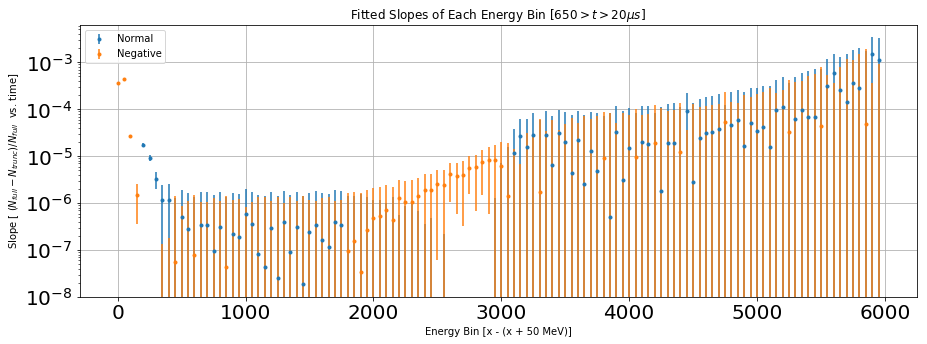

In [83]:
fig,ax = plt.subplots(figsize=(15,5))
plt.errorbar(energies[:-1],p1s,yerr=p1es,fmt='.',label="Normal")
plt.errorbar(energies[:-1],[x*-1 for x in p1s],yerr=p1es,fmt='.',label="Negative")

plt.title(r"Fitted Slopes of Each Energy Bin [$"+str(tmax)+" > t > "+str(tmin)+" \mu s$]")
plt.xlabel("Energy Bin [x - (x + "+str(energyBin)+" MeV)]")
plt.ylabel(r"Slope [ $( N_{full} - N_{trunc} ) / N_{full}$  vs. time]")
#plt.ylim(-0.000051,0.000051)
plt.yscale("log")
plt.grid()
plt.legend()
plt.show()

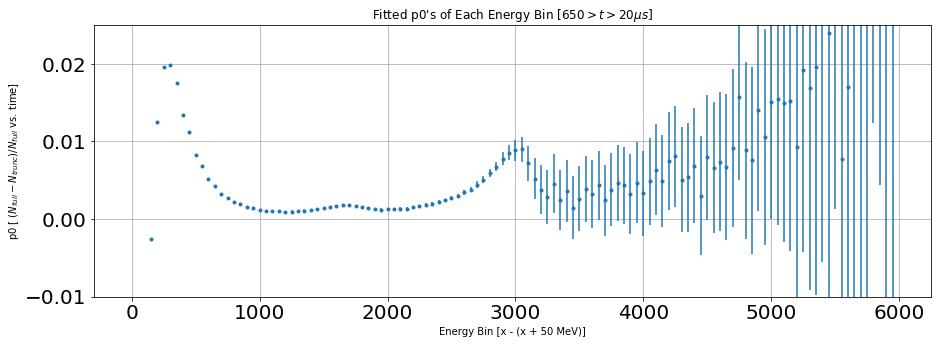

In [84]:
fig,ax = plt.subplots(figsize=(15,5))
plt.errorbar(energies[:-1],p0s,yerr=p0es,fmt='.')
plt.title(r"Fitted p0's of Each Energy Bin [$"+str(tmax)+" > t > "+str(tmin)+" \mu s$]")
plt.xlabel("Energy Bin [x - (x + "+str(energyBin)+" MeV)]")
plt.ylabel(r"p0 [ $( N_{full} - N_{trunc} ) / N_{full}$ vs. time]")
plt.ylim(-0.01,0.025)
plt.grid()
plt.show()